In [7]:
import pandas as pd
import os
import json
import requests
from tqdm.notebook import tqdm

# 경고 무시 모듈
import warnings

# 경고를 무시
warnings.filterwarnings(action='ignore')

In [11]:
전국병원 = pd.read_excel('./원본 DATA/건강보험심사평가원_전국 병의원 및 약국 현황_20220630/1.병원정보서비스 2022.6.xlsx',
                          sheet_name = 0)
print('전국 의료기관 수 :', len(전국병원))

전국 의료기관 수 : 75636


In [14]:
경남병원 = 전국병원[전국병원['시도코드명']=='경남']

In [15]:
경남보건기관 = 경남병원[(경남병원['종별코드명']=='보건소') | 
                         (경남병원['종별코드명']=='보건지소') |
                         (경남병원['종별코드명']=='보건진료소') |
                         (경남병원['종별코드명']=='보건의료원')]

In [10]:
경남보건기관

암호화요양기호           요양기관명  \
18675  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...   거제시거제읍산달보건진료소   
18679  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...      거제시거제면보건지소   
18756  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...       거제시남부보건지소   
18766  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   거제시동부면가배보건진료소   
18768  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   거제시동부면학동보건진료소   
...                                                  ...             ...   
22828  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...      청덕면낙진보건진료소   
22829  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   합천군초계면하남보건진료소   
22830  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...  합천군보건소(초계보건지소)   
22845  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxMzUxIzExIyQxIy...          합천군보건소   
22860  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...   합천군합천읍장인보건진료소   

       종별코드  종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수  \
18675    73  보건진료소  380000    경남  381000    거제시  거제면  53282.0  ...         0   
18679    72   보건지소  380000    경남  381000    거제시  NaN  53286.0  ...         0   
18756    72   보건지소  380000    경남  381000    거제시  남부면  53333.0  ...         0   
18766    73  보건진료소  380000    경남  381000    거제시  동부면  53330.0  ...         0   
18768    73  보건진료소  380000    경남  381000    거제시  고현동  53332.0  ...         0   
...     ...    ...     ...   ...     ...    ...  ...      ...  ...       ...   
22828    73  보건진료소  380000    경남  380019    합천군  청덕면  50253.0  ...         0   
22829    73  보건진료소  380000    경남  380019    합천군  초계면  50245.0  ...         0   
22830    72   보건지소  380000    경남  380019    합천군  초계면  50246.0  ...         0   
22845    71    보건소  380000    경남  380019    합천군  NaN  50232.0  ...         1   
22860    73  보건진료소  380000    경남  380019    합천군  합천읍  50228.0  ...         0   

      치과인턴 인원수 치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  \
18675        0          0         0          0         0           0   
18679        0          0         0          0         0           0   
18756        0          0         0          1         0           0   
18766        0          0         0          0         0           0   
18768        0          0         0          0         0           0   
...        ...        ...       ...        ...       ...         ...   
22828        0          0         0          0         0           0   
22829        0          0         0          0         0           0   
22830        0          0         1          1         0           0   
22845        0          0         1          0         0           0   
22860        0          0         0          0         0           0   

       한방전문의 인원수         x좌표        y좌표  
18675          0  128.532252  34.815429  
18679          0  128.591002  34.847678  
18756          0  128.607743  34.730713  
18766          0  128.569224  34.785001  
18768          0  128.640112  34.776775  
...          ...         ...        ...  
22828          0  128.358608  35.523154  
22829          0  128.250947  35.533999  
22830          0  128.268063  35.557394  
22845          0  128.156845  35.567905  
22860          0  128.116661  35.611671  

[415 rows x 29 columns]

In [12]:
경남보건기관.value_counts('종별코드명')

종별코드명
보건진료소    220
보건지소     175
보건소       19
보건의료원      1
dtype: int64

In [13]:
#경남보건기관.to_csv('./전처리/경남/경남보건기관.csv', encoding='cp949', index=False)

In [16]:
전국시설정보 = pd.read_csv('원본 DATA/공공의료기관.csv', encoding='cp949')

In [17]:
전국시설정보.head(1)

연번    의료기관명 의료기관 종별 관계 행정기관        근거 법령  설립형태      응급지정  허가병상수 운영형태 수탁기관  \
0   1  서울대학교병원  상급종합병원     교육부  서울대학교병원 설치법  특수법인  권역응급의료센터   1761   직영  NaN   

      수련지정  우편번호                        주소          홈페이지       대표전화 FAX  
0  인턴,레지던트  3080  서울특별시 종로구 대학로101 서울대학교병원  www.snuh.org  1588-5700   -

In [18]:
경남시설정보 = 전국시설정보[(전국시설정보['주소'].str.contains('경상남도')) |
             (전국시설정보['주소'].str.contains('경남'))]
경남시설정보.reset_index(drop=True, inplace=True)

In [20]:
# 코드 공유시 API Key 보안을 위해 만든 모듈
import api

In [22]:
경남시설정보['X'] = None
경남시설정보['Y'] = None

for n in tqdm(range(len(경남시설정보))):
    addr = 경남시설정보['주소'][n]
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": f"KakaoAK {api.kakao_api}"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    X = match_first['x']
    Y = match_first['y']

    경남시설정보['X'][n] = X
    경남시설정보['Y'][n] = Y

  0%|          | 0/22 [00:00<?, ?it/s]

In [24]:
경남시설정보

연번                       의료기관명 의료기관 종별 관계 행정기관  \
0   201                   경상남도마산의료원    종합병원    경상남도   
1   202                   경상국립대학교병원  상급종합병원     교육부   
2   203                   양산부산대학교병원  상급종합병원     교육부   
3   204                 근로복지공단 창원병원    종합병원   고용노동부   
4   205                 창원경상국립대학교병원    종합병원     교육부   
5   206                      국립마산병원      병원   질병관리청   
6   207                     통영적십자병원      병원  대한적십자사   
7   208                     거창적십자병원      병원  대한적십자사   
8   209                      국립부곡병원      병원   보건복지부   
9   210            의료법인 순영의료재단 순영병원    요양병원    경상남도   
10  211                     해군해양의료원      병원     국방부   
11  212                    시립창원요양병원    요양병원    경상남도   
12  213     (의)환명의료재단 경상남도립김해노인전문병원    요양병원    경상남도   
13  214               경상남도립양산노인전문병원    요양병원    경상남도   
14  215                 거창군립 노인요양병원    요양병원    경상남도   
15  216  의료법인 진주의료재단 경상남도립 통영노인전문병원    요양병원    경상남도   
16  217                  남해군립노인전문병원    요양병원    경상남도   
17  218   의료법인 행복한의료재단 경남도립사천노인전문병원    요양병원    경상남도   
18  219                  의령군립노인전문병원    요양병원    경상남도   
19  220                    시립마산요양병원    요양병원    경상남도   
20  222                 양산부산대학교치과병원    치과병원     교육부   
21  223                   부산대학교한방병원    한방병원     교육부   

                         근거 법령  설립형태      응급지정  허가병상수 운영형태            수탁기관  \
0        지방의료원의 설립 및 운영에 관한 법률  특수법인  지역응급의료기관    298   위탁       경상국립대학교병원   
1                    국립대학병원설치법  특수법인  권역응급의료센터    885   직영             NaN   
2                   국립대학병원 설치법  특수법인  권역응급의료센터   1209   직영             NaN   
3                    산업재해보상보험법  특수법인  지역응급의료기관    267   직영             NaN   
4                    국립대학병원설치법  특수법인  지역응급의료센터    550   직영             NaN   
5             질병관리청과 그 소속기관 직제    국립         N    354   직영             NaN   
6                    대한적십자사조직법  특수법인         N     99   직영             NaN   
7                    대한적십자사조직법  특수법인         N     91   직영             NaN   
8             보건복지부와 그 소속기관 직제    국립         N    400   직영             NaN   
9    경상남도립 정신병원 및  노인전문병원 설치조례   시도립         N    199   위탁            경상남도   
10                       국군조직법    국립         N    120   위탁             NaN   
11  창원시 시립요양병원의 설치 및 운영에 관한 조례  시군구립         N    182   위탁       의료법인 우산의료   
12     경상남도립정신병원 및 노인전문병원 설치조례   시도립         N    199   위탁          환명의료재단   
13   경상남도립 정신병원 및  노인전문병원 설치조례   시도립         N    210   위탁     의료법인 우산의료재단   
14        거창군립노인요양병원 설치 및 운영조례  시군구립         N    126   위탁       의료법인 아림의료   
15    경상남도립 정신병원 및 노인전문병원 설치조례   시도립         N    262   위탁      의료법인진주의료재단   
16      남해군립 노인전문병원 설치 및 운영 조례  시군구립         N     90   위탁          이도의료재단   
17    경상남도립 정신병원 및 노인전문병원 설치조례   시도립         N    279   위탁    의료법인 행복한의료재단   
18       의령군립 노인전문병원 설치 및 운영조례  시군구립         N    118   위탁          덕수의료재단   
19    창원시립요양병원의 설치 및 운영에 관한 조례  시군구립         N    291   위탁  의료법인 한마음국제의료재단   
20                국립대학치과병원 설치법  특수법인         N     36   직영             NaN   
21                  국립대학병원 설치법  특수법인         N    100   직영             NaN   

       수련지정   우편번호                                주소  \
0      인턴수련  51264    경상남도 창원시 마산합포구3.15대로 231 (장군동)   
1   인턴,레지던트  52727           경상남도 진주시 강남로 79 경상대학교병원   
2   인턴,레지던트  50612                 경남 양산시 물금읍 금오로 20   
3       비수련  51524        경상남도 창원시 성산구 창원대로 721(중앙동)   
4   인턴,레지던트  54172              경상남도 창원시 성산구 삼정자로 11   
5    레지던트수련  51755    경상남도 창원시 마산합포구 가포로 215(가포동486)   
6       비수련  53061                   경상남도 통영시 중앙로 97   
7       비수련  50132               경상남도 거창군 거창읍 중앙로 91   
8    레지던트수련  50365              경상남도 창녕군 부곡면 부곡로 145   
9       비수련  52509  경상남도 사천시 축동면 서삼로 1110-35, \n순영마을   
10      비수련  51698        경상남도 창원시 진해구 진해대로 963번길 35   
11      비수련  51104         경상남도창원시 의창구 북면 단내로 499-32   
12      비수련  50880       경상남도 김해시 김해대로 1814-39 (삼계동)   
13      비수련  50509         경상남도 양산시 상북면 양산대로 1870-64   
14      비수련  50141             경상남도 거창군 거창읍 운정3길 180   
15      비수련  53000           경상남도 통영시 도산면 남해안대로 

In [22]:
#경남시설정보.to_csv('./전처리/경남/경남공공의료기관.csv')

In [23]:
경남병원

암호화요양기호          요양기관명  종별코드  \
18663  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzExIyQxIy...         거제아동의원    31   
18664  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...         거제요양병원    28   
18665  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzIxIyQxIy...    대우조선해양 부속의원    31   
18666  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...         대우치과의원    51   
18667  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzIxIyQxIy...    연세마취통증의학과의원    31   
...                                                  ...            ...   ...   
22859  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzMxIyQxIy...        이홍석내과의원    31   
22860  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...  합천군합천읍장인보건진료소    73   
22861  JDQ4MTYyMiM4MSMkMSMkNCMkMTMkMzgxNzAyIzExIyQxIy...         허승무한의원    93   
22862  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxMzUxIzMxIyQxIy...           해인의원    31   
22863  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxMzUxIzIxIyQxIy...        안동환치과의원    51   

       종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수  \
18663     의원  380000    경남  381000    거제시  NaN  53252.0  ...         0   
18664   요양병원  380000    경남  381000    거제시  NaN  53321.0  ...         0   
18665     의원  380000    경남  381000    거제시  NaN  53302.0  ...         0   
18666   치과의원  380000    경남  381000    거제시  아주동  53304.0  ...         1   
18667     의원  380000    경남  381000    거제시  NaN  53304.0  ...         0   
...      ...     ...   ...     ...    ...  ...      ...  ...       ...   
22859     의원  380000    경남  380019    합천군  합천읍  50231.0  ...         0   
22860  보건진료소  380000    경남  380019    합천군  합천읍  50228.0  ...         0   
22861    한의원  380000    경남  380019    합천군  합천읍  50233.0  ...         0   
22862     의원  380000    경남  380019    합천군  NaN  50232.0  ...         0   
22863   치과의원  380000    경남  380019    합천군  합천읍  50236.0  ...         1   

      치과인턴 인원수 치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  \
18663        0          0         0          0         0           0   
18664        0          0         0          1         0           0   
18665        0          0         0          0         0           0   
18666        0          0         0          0         0           0   
18667        0          0         0          0         0           0   
...        ...        ...       ...        ...       ...         ...   
22859        0          0         0          0         0           0   
22860        0          0         0          0         0           0   
22861        0          0         0          1         0           0   
22862        0          0         0          0         0           0   
22863        0          0         0          0         0           0   

       한방전문의 인원수         x좌표        y좌표  
18663          0  128.622106  34.889810  
18664          0  128.718479  34.859862  
18665          0  128.701682  34.867666  
18666          0  128.693255  34.867421  
18667          0  128.693254  34.867412  
...          ...         ...        ...  
22859          0  128.165093  35.567904  
22860          0  128.116661  35.611671  
22861          0  128.160880  35.567393  
22862          0  128.162994  35.568643  
22863          0  128.162340  35.563906  

[4201 rows x 29 columns]

In [24]:
공공의료기관_list = list(경남시설정보['의료기관명'])

In [25]:
공공의료기관_list

['경상남도마산의료원',
 '경상국립대학교병원',
 '양산부산대학교병원',
 '근로복지공단 창원병원',
 '창원경상국립대학교병원',
 '국립마산병원',
 '통영적십자병원',
 '거창적십자병원',
 '국립부곡병원',
 '의료법인 순영의료재단 순영병원',
 '해군해양의료원',
 '시립창원요양병원',
 '(의)환명의료재단 경상남도립김해노인전문병원',
 '경상남도립양산노인전문병원',
 '거창군립 노인요양병원',
 '의료법인 진주의료재단 경상남도립 통영노인전문병원',
 '남해군립노인전문병원',
 '의료법인 행복한의료재단 경남도립사천노인전문병원',
 '의령군립노인전문병원',
 '시립마산요양병원',
 '양산부산대학교치과병원',
 '부산대학교한방병원']

In [26]:
경남병원.reset_index(drop=True, inplace=True)

In [30]:
delete = []
delete_name = []
for n in 공공의료기관_list:
    for i in range(len(경남병원)): 
        if 경남병원['요양기관명'][i] == n:
            delete.append(i)
            delete_name.append(경남병원['요양기관명'][i])
            continue

In [31]:
delete

[2425,
 1831,
 1454,
 3261,
 3069,
 2453,
 3892,
 305,
 2342,
 1316,
 3661,
 3350,
 510,
 1629,
 295,
 3767,
 988,
 1315,
 1789,
 2651,
 1455,
 1456]

In [32]:
delete_name

['경상남도마산의료원',
 '경상국립대학교병원',
 '양산부산대학교병원',
 '근로복지공단 창원병원',
 '창원경상국립대학교병원',
 '국립마산병원',
 '통영적십자병원',
 '거창적십자병원',
 '국립부곡병원',
 '의료법인 순영의료재단 순영병원',
 '해군해양의료원',
 '시립창원요양병원',
 '(의)환명의료재단 경상남도립김해노인전문병원',
 '경상남도립양산노인전문병원',
 '거창군립 노인요양병원',
 '의료법인 진주의료재단 경상남도립 통영노인전문병원',
 '남해군립노인전문병원',
 '의료법인 행복한의료재단 경남도립사천노인전문병원',
 '의령군립노인전문병원',
 '시립마산요양병원',
 '양산부산대학교치과병원',
 '부산대학교한방병원']

In [34]:
len(delete)

22

In [35]:
len(delete_name)

22

In [36]:
경남병원.drop(delete, axis=0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16576\1648498419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원.drop(delete, axis=0, inplace=True)


In [37]:
경남병원 = 경남병원[(경남병원['종별코드명']!= '보건소') &
                     (경남병원['종별코드명']!= '보건진료소') &
                     (경남병원['종별코드명']!= '보건지소') &
                     (경남병원['종별코드명']!= '보건의료원') ]

In [38]:
경남병원.reset_index(drop=True,inplace=True)

In [39]:
경남병원

암호화요양기호        요양기관명  종별코드  \
0     JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzExIyQxIy...       거제아동의원    31   
1     JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...       거제요양병원    28   
2     JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzIxIyQxIy...  대우조선해양 부속의원    31   
3     JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...       대우치과의원    51   
4     JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzIxIyQxIy...  연세마취통증의학과의원    31   
...                                                 ...          ...   ...   
3759  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...     단아미소치과의원    51   
3760  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzMxIyQxIy...      이홍석내과의원    31   
3761  JDQ4MTYyMiM4MSMkMSMkNCMkMTMkMzgxNzAyIzExIyQxIy...       허승무한의원    93   
3762  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxMzUxIzMxIyQxIy...         해인의원    31   
3763  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxMzUxIzIxIyQxIy...      안동환치과의원    51   

     종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수 치과인턴 인원수  \
0       의원  380000    경남  381000    거제시  NaN  53252.0  ...         0        0   
1     요양병원  380000    경남  381000    거제시  NaN  53321.0  ...         0        0   
2       의원  380000    경남  381000    거제시  NaN  53302.0  ...         0        0   
3     치과의원  380000    경남  381000    거제시  아주동  53304.0  ...         1        0   
4       의원  380000    경남  381000    거제시  NaN  53304.0  ...         0        0   
...    ...     ...   ...     ...    ...  ...      ...  ...       ...      ...   
3759  치과의원  380000    경남  380019    합천군  합천읍  50231.0  ...         1        0   
3760    의원  380000    경남  380019    합천군  합천읍  50231.0  ...         0        0   
3761   한의원  380000    경남  380019    합천군  합천읍  50233.0  ...         0        0   
3762    의원  380000    경남  380019    합천군  NaN  50232.0  ...         0        0   
3763  치과의원  380000    경남  380019    합천군  합천읍  50236.0  ...         1        0   

     치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  \
0             0         0          0         0           0          0   
1             0         0          1         0           0          0   
2             0         0          0         0           0          0   
3             0         0          0         0           0          0   
4             0         0          0         0           0          0   
...         ...       ...        ...       ...         ...        ...   
3759          0         0          0         0           0          0   
3760          0         0          0         0           0          0   
3761          0         0          1         0           0          0   
3762          0         0          0         0           0          0   
3763          0         0          0         0           0          0   

             x좌표        y좌표  
0     128.622106  34.889810  
1     128.718479  34.859862  
2     128.701682  34.867666  
3     128.693255  34.867421  
4     128.693254  34.867412  
...          ...        ...  
3759  128.164967  35.568306  
3760  128.165093  35.567904  
3761  128.160880  35.567393  
3762  128.162994  35.568643  
3763  128.162340  35.563906  

[3764 rows x 29 columns]

In [40]:
교도구치소 = list(경남병원[(경남병원['요양기관명'].str.contains('교도소')) |
             (경남병원['요양기관명'].str.contains('구치소'))].index)

In [41]:
교도구치소

[947, 1642, 2561, 3500]

In [42]:
경남병원.drop(교도구치소, axis=0, inplace=True)
경남병원.reset_index(drop=True, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16576\1951383638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원.drop(교도구치소, axis=0, inplace=True)


In [43]:
#경남병원.to_csv('./전처리/경남/민간병원.csv', encoding='cp949')

In [45]:
len(경남병원)

3760

In [46]:
경남병원.head()

암호화요양기호        요양기관명  종별코드 종별코드명  \
0  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzExIyQxIy...       거제아동의원    31    의원   
1  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...       거제요양병원    28  요양병원   
2  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzIxIyQxIy...  대우조선해양 부속의원    31    의원   
3  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...       대우치과의원    51  치과의원   
4  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzIxIyQxIy...  연세마취통증의학과의원    31    의원   

     시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수 치과인턴 인원수  \
0  380000    경남  381000    거제시  NaN  53252.0  ...         0        0   
1  380000    경남  381000    거제시  NaN  53321.0  ...         0        0   
2  380000    경남  381000    거제시  NaN  53302.0  ...         0        0   
3  380000    경남  381000    거제시  아주동  53304.0  ...         1        0   
4  380000    경남  381000    거제시  NaN  53304.0  ...         0        0   

  치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  \
0          0         0          0         0           0          0   
1          0         0          1         0           0          0   
2          0         0          0         0           0          0   
3          0         0          0         0           0          0   
4          0         0          0         0           0          0   

          x좌표        y좌표  
0  128.622106  34.889810  
1  128.718479  34.859862  
2  128.701682  34.867666  
3  128.693255  34.867421  
4  128.693254  34.867412  

[5 rows x 29 columns]

In [47]:
경남병원.columns

Index(['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명',
       '읍면동', '우편번호', '주소', '전화번호', '병원홈페이지(URL)', '개설일자', '총의사수', '의과일반의 인원수',
       '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수',
       '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수',
       '한방전문의 인원수', 'x좌표', 'y좌표'],
      dtype='object')

In [39]:
    for n in tqdm(range(len(경남병원))):
        try:
            addr = 경남병원['주소'][n]
            if addr == '경상남도 거제시 거제면 거제남서로 3554 3554':
                addr = '경상남도 거제시 거제면 거제남서로 3554'
            if addr == '경상남도 거제시 두모길 16-16 (두모동)':
                addr = '경남 거제시 두모길 16'


            addr = 경남병원['주소'][n]
            addr = addr.split()


            for i in addr:
                if '로' in i or '길' in i:
                    addr = addr[:addr.index(i) + 2]
                    break
            addr = " ".join(addr)
            if addr == '경상남도 거제시 두모길 16-16':
                addr = '경남 거제시 두모길 16'
            elif addr == '경상남도 김해시 주촌면 소망길 263':
                addr = '경남 김해시 주촌면 이지산단로 155'

            elif addr == '경상남도 김해시 계동로23번길 17-14,':
                addr ='경남 김해시 계동로23번길 19-14'

            elif addr == '경상남도 김해시 분성로335번길 28':
                addr = '경남 김해시 분성로335번길 26'

            elif addr == '경상남도 김해시 진영읍 하계로 197-12':
                addr = '경남 김해시 진영읍 하계로 191-3'
            elif addr == '경상남도 밀양시 삼랑진읍 삼랑진로 212-1':
                addr = '경남 밀양시 삼랑진읍 삼랑진로 214'
            elif addr == '경상남도 밀양시 삼랑진읍 삼랑진로 212-1':
                addr = '경남 밀양시 삼랑진읍 삼랑진로 214'
            elif addr == '경상남도 진주시 금산면 송백로 46 46':
                addr = '경상남도 진주시 금산면 송백로 46'



            #print(addr)
            url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
            headers = {"Authorization": "KakaoAK 073a393656181c6073880062d3507191"}
            result = json.loads(str(requests.get(url, headers=headers).text))
            match_first = result['documents'][0]['address']
            X = match_first['x']
            Y = match_first['y']

            경남병원['x좌표'][n] = X
            경남병원['y좌표'][n] = Y

        except:
            continue

  0%|                                                                                         | 0/3760 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15920\1631536971.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원['x좌표'][n] = X
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15920\1631536971.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원['y좌표'][n] = Y
100%|██████████████████████████████████████████████████████████████████████████████| 3760/3760 [07:47<00:00,  8.05it/s]


경남병원.loc[1617]

addr = '경상남도 밀양시 삼랑진읍 삼랑진로 212-1 (삼랑진읍)'
if addr == '경상남도 거제시 거제면 거제남서로 3554 3554':
    addr = '경상남도 거제시 거제면 거제남서로 3554'
if addr == '경상남도 거제시 두모길 16-16 (두모동)':
    addr = '경남 거제시 두모길 16'


addr = 경남병원['주소'][n]
addr = addr.split()


for i in addr:
    if '로' in i or '길' in i:
        addr = addr[:addr.index(i) + 2]
        break
addr = " ".join(addr)
addr

In [40]:
# 경남병원.to_csv('./전처리/경남/민간병원.csv', encoding='cp949')

In [48]:
경남병원 = pd.read_csv('./전처리/경남/민간병원.csv', encoding='cp949')

In [53]:
len(경남병원)

3760

In [50]:
경남병원.drop('Unnamed: 0', axis=1, inplace=True)

In [54]:
경남병원.head(1)

암호화요양기호   요양기관명  종별코드 종별코드명  \
0  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzExIyQxIy...  거제아동의원    31    의원   

     시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수 치과인턴 인원수  \
0  380000    경남  381000    거제시  NaN  53252.0  ...         0        0   

  치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  \
0          0         0          0         0           0          0   

          x좌표       y좌표  
0  128.622105  34.88981  

[1 rows x 29 columns]

In [55]:
경남병원.columns

Index(['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명',
       '읍면동', '우편번호', '주소', '전화번호', '병원홈페이지(URL)', '개설일자', '총의사수', '의과일반의 인원수',
       '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수',
       '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수',
       '한방전문의 인원수', 'x좌표', 'y좌표'],
      dtype='object')

In [56]:
경남병원['종별코드명'].value_counts()

의원      1698
치과의원     929
한의원      802
병원       128
요양병원     118
정신병원      26
종합병원      20
치과병원      19
한방병원      18
상급종합       1
조산원        1
Name: 종별코드명, dtype: int64

In [57]:
병원급 = {'의원급' : 1698 + 929 + 802 + 1,
          '병원급' : 128 + 118 + 26 + 19 + 18, 
          '종합병원급' : 20,
          '상급종합병원급' : 1}

In [58]:
병원급분류 = pd.Series(병원급)

In [60]:
import matplotlib.pyplot as plt

In [61]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [64]:
병원급분류

의원급        3430
병원급         309
종합병원급        20
상급종합병원급       1
dtype: int64

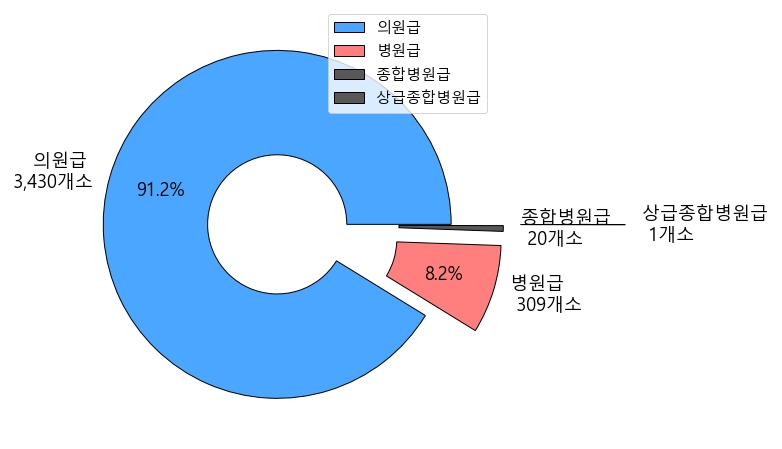

In [79]:
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 1 else ''


f, ax = plt.subplots(figsize=(8, 8), facecolor='w')
plt.rc('font', size=15)


x = 병원급분류.index
y = 병원급분류.values


title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

# plt.title('2022년 경남 의료기관 비율',  fontdict=title_font)


labels = ['의원급 \n 3,430개소', '병원급 \n 309개소', '종합병원급 \n 20개소', '상급종합병원급 \n 1개소']

wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(y, 
        labels = labels, 
        autopct=customPct,
        explode=[0, 0.3, 0.3, 1],
        wedgeprops = wedgeprops, 
        pctdistance=0.7,
        textprops={'size': 18},
        colors = ['#4ba6ff',  '#ff7f7f', '#585858', '#585858'])


plt.legend(list(x))

#plt.legend(loc = (1, 0.5))
plt.show()

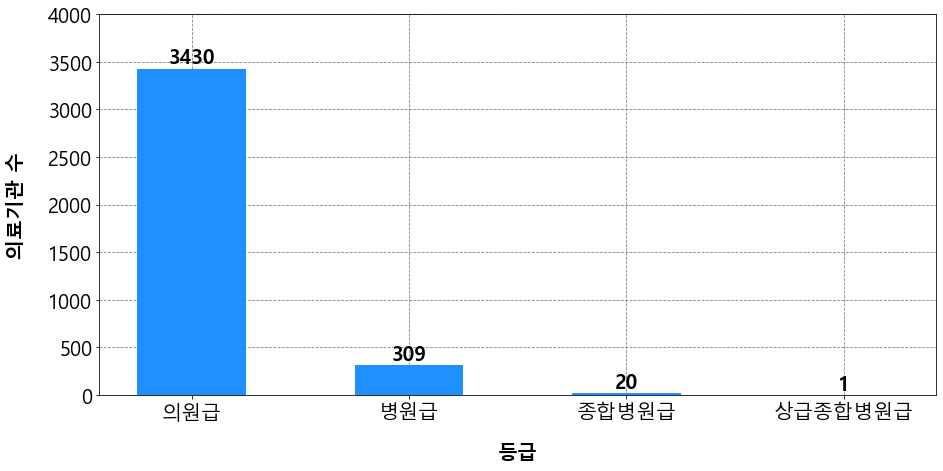

In [82]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=20)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# plt.grid(True)


x = 병원급분류.index[:]
y = 병원급분류.values[:]

bar = plt.bar(x, y, color='dodgerblue',  width=0.5)


for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.5, '%.0f' % height, 
             ha='center', va='bottom', size = 20,fontweight = 'bold')

plt.ylim([0, 4000])

# plt.title('의료기관 등급 현황', size=25, pad=20, fontweight = 'bold')
plt.xlabel('등급', labelpad=20, size=20, weight ='bold')
plt.ylabel('의료기관 수', labelpad=20, size=20, weight ='bold')

plt.show()